In [4]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Tweets/Leroy Hill_Trans 1.csv"

#Establish pd dataframe for each file
leroyhill1 = pd.read_csv(csv_path1, sep=";")

#concatenate data frames *kennybritt4* not working
leroyhill_master = pd.concat([leroyhill1])
leroyhill_master

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2013-03-18 16:21,0,0,RT @ RossTuckerEA Seems like every player gets...,NaN,@,#,313762063795240960,https://twitter.com/MaddenNJ2013/status/313762...
1,NaN,2013-03-18 15:24,11,2,"Take it for what it's worth, but http://Seahaw...",NaN,NaN,NaN,313747773294006272,https://twitter.com/Curtis_Crabtree/status/313...
2,NaN,2013-03-18 15:16,1,1,"Also, just saw on the # Seahawks website that ...",NaN,NaN,#,313745686606802947,https://twitter.com/BradyHenderson/status/3137...
3,NaN,2013-03-18 04:09,0,0,@ showoff_32 @kam_chancellor Leroy hill too,NaN,@ @kam_chancellor,NaN,313577860172492800,https://twitter.com/TyHarris24/status/31357786...
4,NaN,2013-03-18 03:18,0,0,But somebody please explain to me why the Seah...,NaN,NaN,NaN,313565157672509440,https://twitter.com/UMADBRO2587/status/3135651...
5,NaN,2013-03-17 19:55,0,0,RT @ SkipBaylessEA If LeRoy Hill puts forth mo...,NaN,@,# #,313453624372101120,https://twitter.com/bosay831/status/3134536243...
6,NaN,2013-03-17 14:56,0,0,Cliff Avril will wear #56 for the # Seahawks w...,NaN,NaN,#56 #,313378277190430721,https://twitter.com/EricHansman/status/3133782...
7,NaN,2013-03-17 11:04,0,0,I need to go down to Leroy hill,NaN,NaN,NaN,313319935629742082,https://twitter.com/WyattGraham/status/3133199...
8,NaN,2013-03-17 05:30,0,0,RT @ mortreportEA LeRoy Hill has been released...,NaN,@,# #,313235832385466368,https://twitter.com/WmNv_Franchise/status/3132...
9,NaN,2013-03-16 00:26,0,0,@ DavisHsuSeattle but it does mean the end of ...,NaN,@,NaN,312797121613029376,https://twitter.com/amack319/status/3127971216...


In [5]:
#fillna's with text to fix error
leroyhill_master["text"].fillna("text", inplace=True)
leroyhill_master.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2013-03-18 16:21,0,0,RT @ RossTuckerEA Seems like every player gets...,NaN,@,#,313762063795240960,https://twitter.com/MaddenNJ2013/status/313762...
1,NaN,2013-03-18 15:24,11,2,"Take it for what it's worth, but http://Seahaw...",NaN,NaN,NaN,313747773294006272,https://twitter.com/Curtis_Crabtree/status/313...
2,NaN,2013-03-18 15:16,1,1,"Also, just saw on the # Seahawks website that ...",NaN,NaN,#,313745686606802947,https://twitter.com/BradyHenderson/status/3137...
3,NaN,2013-03-18 04:09,0,0,@ showoff_32 @kam_chancellor Leroy hill too,NaN,@ @kam_chancellor,NaN,313577860172492800,https://twitter.com/TyHarris24/status/31357786...
4,NaN,2013-03-18 03:18,0,0,But somebody please explain to me why the Seah...,NaN,NaN,NaN,313565157672509440,https://twitter.com/UMADBRO2587/status/3135651...


In [6]:
#create list of sentiment scores associated with tweets about relevant player

leroyhill_sent = []

tweets = leroyhill_master["text"]

for index,tweet in leroyhill_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    leroyhill_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
leroyhill_sent

[{'Compound': 0.3612,
  'Negative': 0.894,
  'Neutral': 0.0,
  'Positive': 0.106,
  'date': '2013-03-18 16:21'},
 {'Compound': -0.3291,
  'Negative': 0.817,
  'Neutral': 0.12,
  'Positive': 0.062,
  'date': '2013-03-18 15:24'},
 {'Compound': -0.2263,
  'Negative': 0.821,
  'Neutral': 0.113,
  'Positive': 0.067,
  'date': '2013-03-18 15:16'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2013-03-18 04:09'},
 {'Compound': -0.5859,
  'Negative': 0.719,
  'Neutral': 0.213,
  'Positive': 0.069,
  'date': '2013-03-18 03:18'},
 {'Compound': 0.4173,
  'Negative': 0.866,
  'Neutral': 0.0,
  'Positive': 0.134,
  'date': '2013-03-17 19:55'},
 {'Compound': 0.4939,
  'Negative': 0.84,
  'Neutral': 0.0,
  'Positive': 0.16,
  'date': '2013-03-17 14:56'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2013-03-17 11:04'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2013-03-17 05:30'}

In [7]:
# Convert player sentiments to DataFrame
LH_pd = pd.DataFrame.from_dict(leroyhill_sent)
LH_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.3612,0.894,0.000,0.106,2013-03-18 16:21
1,-0.3291,0.817,0.120,0.062,2013-03-18 15:24
2,-0.2263,0.821,0.113,0.067,2013-03-18 15:16
3,0.0000,1.000,0.000,0.000,2013-03-18 04:09
4,-0.5859,0.719,0.213,0.069,2013-03-18 03:18


In [8]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(leroyhill_master, LH_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2013-03-18 16:21,0,0,RT @ RossTuckerEA Seems like every player gets...,NaN,@,#,313762063795240960,https://twitter.com/MaddenNJ2013/status/313762...,0.3612,0.894,0.000,0.106
1,NaN,2013-03-18 15:24,11,2,"Take it for what it's worth, but http://Seahaw...",NaN,NaN,NaN,313747773294006272,https://twitter.com/Curtis_Crabtree/status/313...,-0.3291,0.817,0.120,0.062
2,NaN,2013-03-18 15:16,1,1,"Also, just saw on the # Seahawks website that ...",NaN,NaN,#,313745686606802947,https://twitter.com/BradyHenderson/status/3137...,-0.2263,0.821,0.113,0.067
3,NaN,2013-03-18 04:09,0,0,@ showoff_32 @kam_chancellor Leroy hill too,NaN,@ @kam_chancellor,NaN,313577860172492800,https://twitter.com/TyHarris24/status/31357786...,0.0000,1.000,0.000,0.000
4,NaN,2013-03-18 03:18,0,0,But somebody please explain to me why the Seah...,NaN,NaN,NaN,313565157672509440,https://twitter.com/UMADBRO2587/status/3135651...,-0.5859,0.719,0.213,0.069


In [9]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2013-03-18 16:21,0,0,RT @ RossTuckerEA Seems like every player gets...,NaN,@,#,313762063795240960,https://twitter.com/MaddenNJ2013/status/313762...,0.3612,0.894,0.000,0.106,2013-03-18
1,NaN,2013-03-18 15:24,11,2,"Take it for what it's worth, but http://Seahaw...",NaN,NaN,NaN,313747773294006272,https://twitter.com/Curtis_Crabtree/status/313...,-0.3291,0.817,0.120,0.062,2013-03-18
2,NaN,2013-03-18 15:16,1,1,"Also, just saw on the # Seahawks website that ...",NaN,NaN,#,313745686606802947,https://twitter.com/BradyHenderson/status/3137...,-0.2263,0.821,0.113,0.067,2013-03-18
3,NaN,2013-03-18 04:09,0,0,@ showoff_32 @kam_chancellor Leroy hill too,NaN,@ @kam_chancellor,NaN,313577860172492800,https://twitter.com/TyHarris24/status/31357786...,0.0000,1.000,0.000,0.000,2013-03-18
4,NaN,2013-03-18 03:18,0,0,But somebody please explain to me why the Seah...,NaN,NaN,NaN,313565157672509440,https://twitter.com/UMADBRO2587/status/3135651...,-0.5859,0.719,0.213,0.069,2013-03-18


In [11]:
merged["date_string"] = merged["date_new"].dt.strftime('%Y-%m-%d')
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new,date_string
0,NaN,2013-03-18 16:21,0,0,RT @ RossTuckerEA Seems like every player gets...,NaN,@,#,313762063795240960,https://twitter.com/MaddenNJ2013/status/313762...,0.3612,0.894,0.000,0.106,2013-03-18,2013-03-18
1,NaN,2013-03-18 15:24,11,2,"Take it for what it's worth, but http://Seahaw...",NaN,NaN,NaN,313747773294006272,https://twitter.com/Curtis_Crabtree/status/313...,-0.3291,0.817,0.120,0.062,2013-03-18,2013-03-18
2,NaN,2013-03-18 15:16,1,1,"Also, just saw on the # Seahawks website that ...",NaN,NaN,#,313745686606802947,https://twitter.com/BradyHenderson/status/3137...,-0.2263,0.821,0.113,0.067,2013-03-18,2013-03-18
3,NaN,2013-03-18 04:09,0,0,@ showoff_32 @kam_chancellor Leroy hill too,NaN,@ @kam_chancellor,NaN,313577860172492800,https://twitter.com/TyHarris24/status/31357786...,0.0000,1.000,0.000,0.000,2013-03-18,2013-03-18
4,NaN,2013-03-18 03:18,0,0,But somebody please explain to me why the Seah...,NaN,NaN,NaN,313565157672509440,https://twitter.com/UMADBRO2587/status/3135651...,-0.5859,0.719,0.213,0.069,2013-03-18,2013-03-18


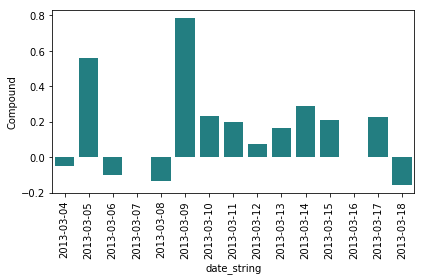

In [12]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby('date_string').mean().reset_index()
grouped.sort_values("date_string", ascending = True, inplace = True)
grouped.head()
sns.barplot(x = grouped["date_string"], y = grouped["Compound"], color = "#138D91")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('leroyhill.png')
plt.show()
